In [1]:
### Pick the file directory
directory = '/media/ab/data/Research_Data/Enhancers/ConservationScores/'

['output (copy).con', 'output.con']
nonvalues =  72809
data:  6106


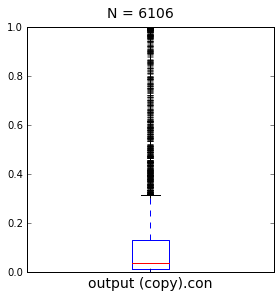

nonvalues =  72809
data:  6106


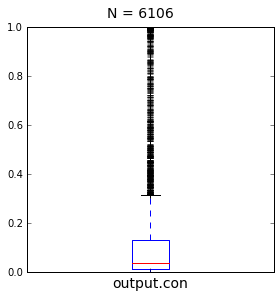

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [24]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick


### Initiate lists of variables for later use
conScores = []
#all_data = dict()
def main():  
    
    dir_list = sorted(os.listdir(directory))
    print dir_list
    for filename in dir_list:
        if filename[-4:] == '.con':      ### Load only the TSV files
            conScores = load_from_file(directory+filename)
        make_graphs(filename, conScores)

def load_from_file(file_to_open):              
    
    nonvalues = 0
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        meanConScore = (line.strip('\n').split('\t')[6])
        if meanConScore != ".":
            data.append(float(meanConScore))
        else:
            nonvalues += 1
    print "nonvalues = ", nonvalues        
    x.close()
    return data 
        
        
def make_graphs(fn, data):
    
    print "data: ", len(data)
    #print "data: ", data[:400]
    #print type(data[1])
    x_bins = 200

    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
    n = "N = "+str(len(data))
    #axs = axs.ravel()
    axs.boxplot(data)
    #axs.hist(data, x_bins, histtype='bar')
    #axs.set_title(key)
    #axs.locator_params(axis='x',nbins=6)
    #axs.set_yscale("log", nonposy='clip')
    #axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    #axs.set_xlim(left=-100000, right=100000)
    #axs.set_ylim(bottom=.0000001, top=.0001)
    
    #print chrom
    
    ### Add a title to the plot
    fig.suptitle(n, y=1.02, fontsize=14)
    #axs.text(.7, .5, n)
    #axs.xlabel(fn)
    axs.set_xticklabels([fn], fontsize=14)
    ### Set the layout and show the plot
    plt.tight_layout()
    plt.show()
    

if __name__ == "__main__":
    sys.exit(main())